In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# Carregamento da planilha
arquivo = "Dataset\Sales.xlsx"
xls = pd.ExcelFile(arquivo)
df = xls.parse("Sales")

# Visualizar as primeiras linhas
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\gabri\AppData\Local\Temp\ipykernel_34556\1756351777.py:2: SyntaxWarning: invalid escape sequence '\S'
  arquivo = "Dataset\Sales.xlsx"


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


- Indicadores principais (KPIs)

In [3]:
# Lucro e Receita total
lucro_total = df["Profit"].sum()
receita_total = df["Revenue"].sum()

# Variação ano a ano
yoy = df.groupby("Year")[["Profit", "Revenue"]].sum().pct_change() * 100

# Exibir
print(f"Lucro Total: R$ {lucro_total:,.0f}")
print(f"Receita Total: R$ {receita_total:,.0f}")
print("Variação ano a ano (último ano disponível):")
display(yoy.tail(1))

Lucro Total: R$ 32,221,100
Receita Total: R$ 85,271,008
Variação ano a ano (último ano disponível):


,Profit,Revenue
Year,,
2016,-6.543281,-11.539188


- Top 10 produtos por lucro

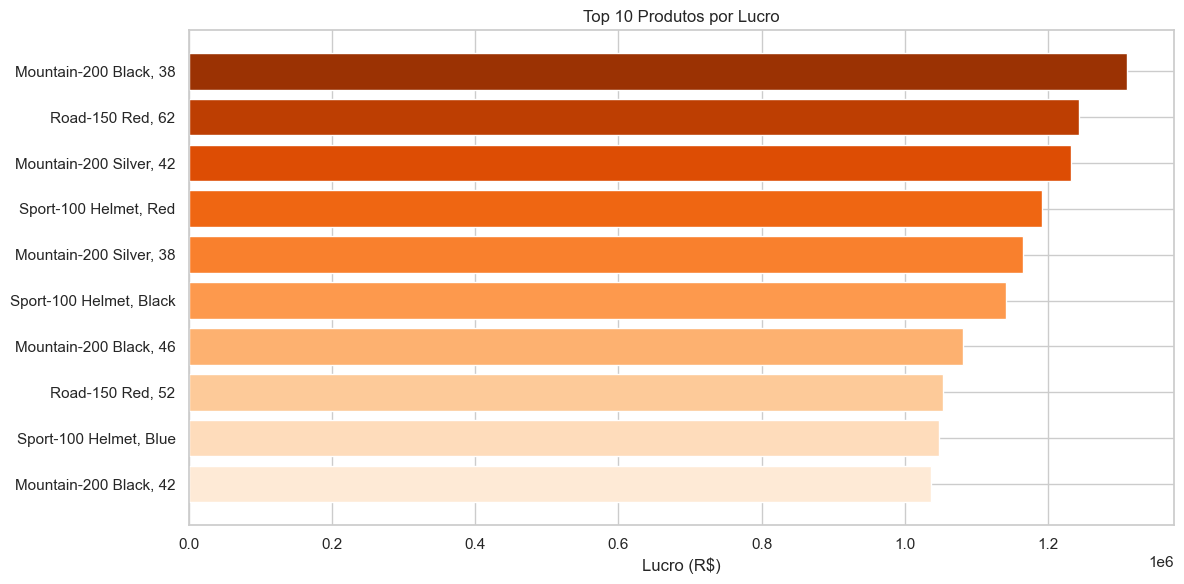

In [4]:
top_produtos = df.groupby("Product")["Profit"].sum().nlargest(10).sort_values()

plt.barh(top_produtos.index, top_produtos.values, color=sns.color_palette("Oranges", len(top_produtos)))
plt.title("Top 10 Produtos por Lucro")
plt.xlabel("Lucro (R$)")
plt.tight_layout()
plt.show()


- Lucro por categoria e gênero

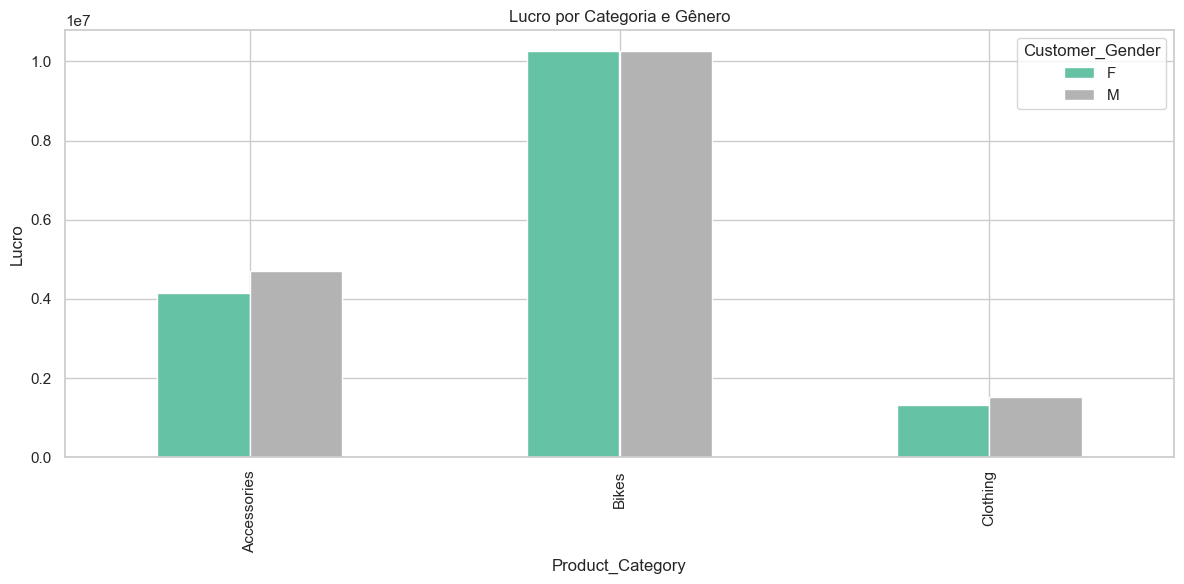

In [5]:
categoria_genero = df.groupby(["Product_Category", "Customer_Gender"])["Profit"].sum().unstack()

categoria_genero.plot(kind="bar", stacked=False, colormap="Set2")
plt.title("Lucro por Categoria e Gênero")
plt.ylabel("Lucro")
plt.tight_layout()
plt.show()


- Distribuição por faixa etária

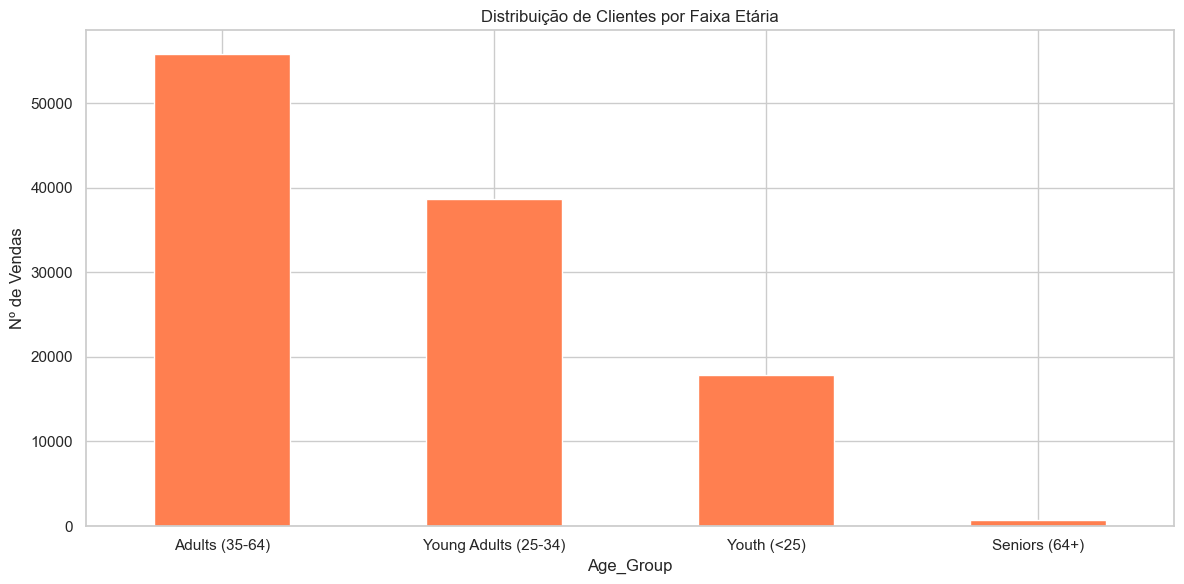

In [8]:
faixa_etaria = df["Age_Group"].value_counts()

faixa_etaria.plot(kind="bar", color="coral")
plt.title("Distribuição de Clientes por Faixa Etária")
plt.ylabel("Nº de Vendas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Lucro por país

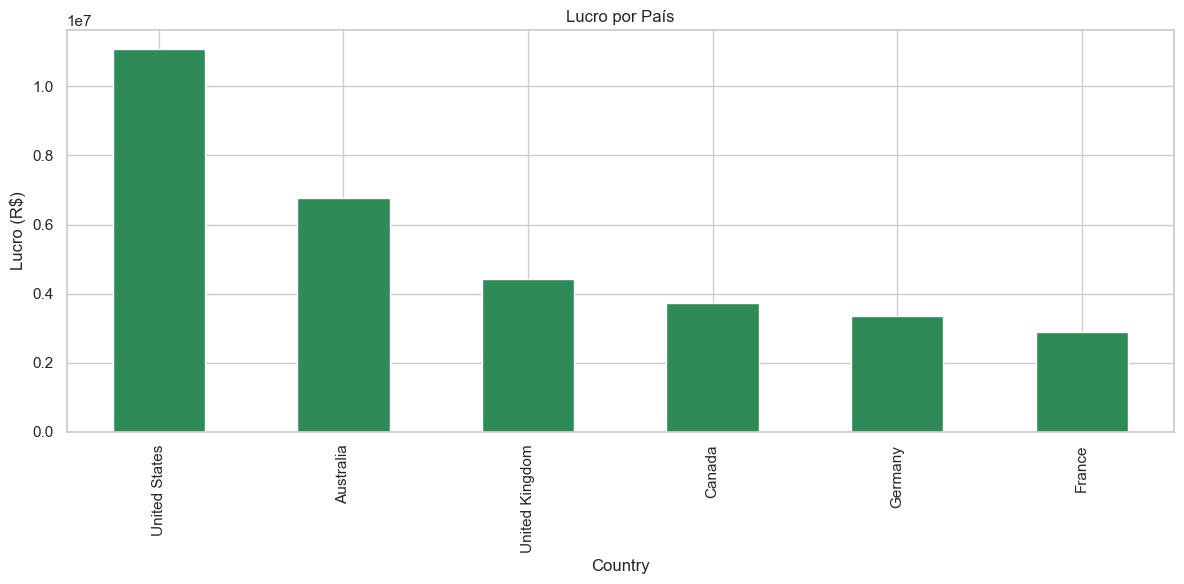

In [9]:
lucro_pais = df.groupby("Country")["Profit"].sum().sort_values(ascending=False)

lucro_pais.plot(kind="bar", color="seagreen")
plt.title("Lucro por País")
plt.ylabel("Lucro (R$)")
plt.tight_layout()
plt.show()

- Tendência de Lucro por Ano

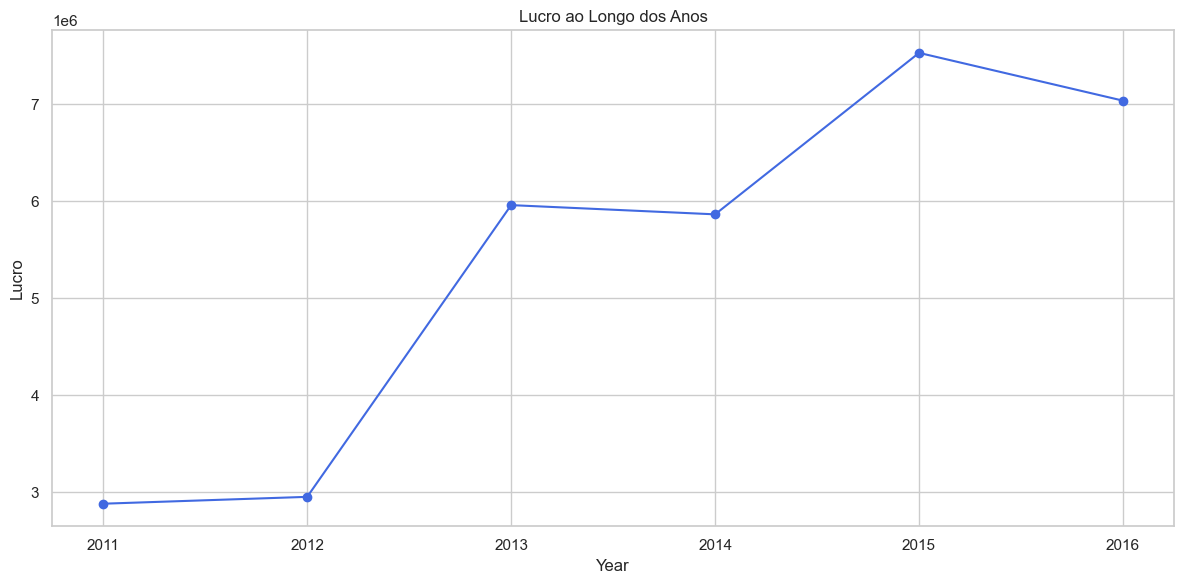

In [10]:
lucro_ano = df.groupby("Year")["Profit"].sum()

lucro_ano.plot(marker="o", color="royalblue")
plt.title("Lucro ao Longo dos Anos")
plt.ylabel("Lucro")
plt.grid(True)
plt.tight_layout()
plt.show()